# Financial Time Series

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

/var/folders/8p/w9td_q854qx0l9bsbh5l3nvw0000gn/T/ipykernel_6076/386196737.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Financial Data

### Data Import

In [2]:
filename = './tr_eikon_eod_data.csv'  

In [3]:
f = open(filename, 'r')  
f.readlines()[:15]  

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n',
 '2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n',
 '2010-01-08,30.28282686,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1,49.84,111.37\n',
 '2010-01-11,30.015684270000005,30.27,20.95,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.6,50.17,112.85\n',
 '2010-01-12,29.674256040000003,30.07,20.608,127.35,167.82,113.66,1136.22,18.25,1.4494,1127.3,48.35,110.49\n',
 '2010-01-13,30.092827050000004,30.35,20.96,129.11,169.07,114.62,1145.68,17.85,1.451,1138.4,48.86,111.54\n',
 '2010-01-14,29.9185

In [4]:
data = pd.read_csv(filename,  
                   index_col=0, 
                   parse_dates=True)  

In [5]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [6]:
data.tail()  

AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                          
2018-06-25  182.17   98.39   50.71  1663.15  221.54  271.00  2717.07  17.33   
2018-06-26  184.43   99.08   49.67  1691.09  221.58  271.60  2723.06  15.92   
2018-06-27  184.16   97.54   48.76  1660.51  220.18  269.35  2699.63  17.91   
2018-06-28  185.50   98.63   49.25  1701.45  223.42  270.89  2716.31  16.85   
2018-06-29  185.11   98.61   49.71  1699.80  220.57  271.28  2718.37  16.09   

              EUR=     XAU=    GDX     GLD  
Date                                        
2018-06-25  1.1702  1265.00  22.01  119.89  
2018-06-26  1.1645  1258.64  21.95  119.26  
2018-06-27  1.1552  1251.62  21.81  118.58  
2018-06-28  1.1567  1247.88  21.93  118.22  
2018-06-29  1.1683  1252.25  22.31  118.65

In [7]:
data.head()  

AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                            
2010-01-01        NaN     NaN     NaN     NaN     NaN     NaN      NaN    NaN   
2010-01-04  30.572827  30.950   20.88  133.90  173.08  113.33  1132.99  20.04   
2010-01-05  30.625684  30.960   20.87  134.69  176.14  113.63  1136.52  19.35   
2010-01-06  30.138541  30.770   20.80  132.25  174.26  113.71  1137.14  19.16   
2010-01-07  30.082827  30.452   20.60  130.00  177.67  114.19  1141.69  19.06   

              EUR=     XAU=    GDX     GLD  
Date                                        
2010-01-01  1.4323  1096.35    NaN     NaN  
2010-01-04  1.4411  1120.00  47.71  109.80  
2010-01-05  1.4368  1118.65  48.17  109.70  
2010-01-06  1.4412  1138.50  49.34  111.51  
2010-01-07  1.4318  1131.90  49.10  110.82

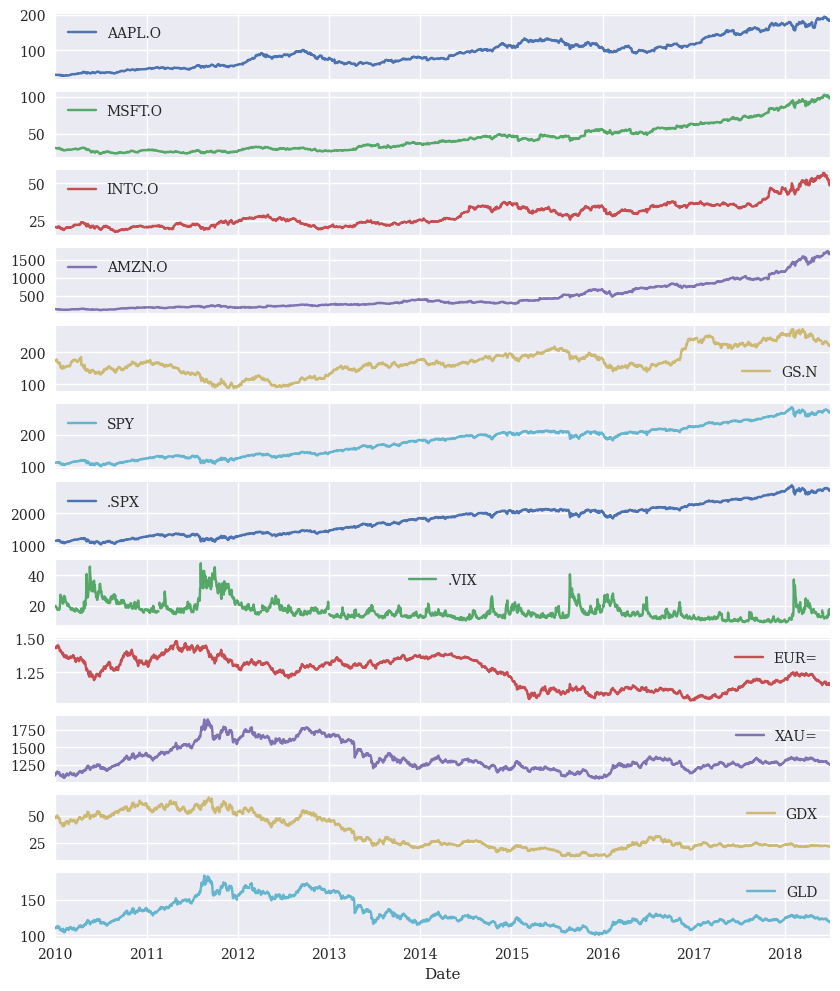

In [8]:
data.plot(figsize=(10, 12), subplots=True);  
# plt.savefig('../../images/ch08/fts_01.png');

In [9]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [10]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


### Summary Statistics

In [11]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [12]:
data.describe().round(2)  

AAPL.O   MSFT.O   INTC.O   AMZN.O     GS.N      SPY     .SPX     .VIX  \
count  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00   
mean     93.46    44.56    29.36   480.46   170.22   180.32  1802.71    17.03   
std      40.55    19.53     8.17   372.31    42.48    48.19   483.34     5.88   
min      27.44    23.01    17.66   108.61    87.70   102.20  1022.58     9.14   
25%      60.29    28.57    22.51   213.60   146.61   133.99  1338.57    13.07   
50%      90.55    39.66    27.33   322.06   164.43   186.32  1863.08    15.58   
75%     117.24    54.37    34.71   698.85   192.13   210.99  2108.94    19.07   
max     193.98   102.49    57.08  1750.08   273.38   286.58  2872.87    48.00   

          EUR=     XAU=      GDX      GLD  
count  2216.00  2211.00  2138.00  2138.00  
mean      1.25  1349.01    33.57   130.09  
std       0.11   188.75    15.17    18.78  
min       1.04  1051.36    12.47   100.50  
25%       1.13  1221.53    22.14   117.40  
50%       1.27  1292.61    25.62   124.00  
75%       1.35  1428.24    48.34   139.00  
max       1.48  1898.99    66.63   184.59

In [13]:
data.mean()  

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [14]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX   .VIX  EUR=  \
min      27.44   23.01   17.66   108.61   87.70  102.20  1022.58   9.14  1.04   
mean     93.46   44.56   29.36   480.46  170.22  180.32  1802.71  17.03  1.25   
std      40.55   19.53    8.17   372.31   42.48   48.19   483.34   5.88  0.11   
median   90.55   39.66   27.33   322.06  164.43  186.32  1863.08  15.58  1.27   
max     193.98  102.49   57.08  1750.08  273.38  286.58  2872.87  48.00  1.48   

           XAU=    GDX     GLD  
min     1051.36  12.47  100.50  
mean    1349.01  33.57  130.09  
std      188.75  15.17   18.78  
median  1292.61  25.62  124.00  
max     1898.99  66.63  184.59

### Changes Over Time

In [22]:
data.head()

AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                            
2010-01-01        NaN     NaN     NaN     NaN     NaN     NaN      NaN    NaN   
2010-01-04  30.572827  30.950   20.88  133.90  173.08  113.33  1132.99  20.04   
2010-01-05  30.625684  30.960   20.87  134.69  176.14  113.63  1136.52  19.35   
2010-01-06  30.138541  30.770   20.80  132.25  174.26  113.71  1137.14  19.16   
2010-01-07  30.082827  30.452   20.60  130.00  177.67  114.19  1141.69  19.06   

              EUR=     XAU=    GDX     GLD  
Date                                        
2010-01-01  1.4323  1096.35    NaN     NaN  
2010-01-04  1.4411  1120.00  47.71  109.80  
2010-01-05  1.4368  1118.65  48.17  109.70  
2010-01-06  1.4412  1138.50  49.34  111.51  
2010-01-07  1.4318  1131.90  49.10  110.82

In [23]:
data.diff().head()   # Diff between two consecutive rows,  it shows the daily returns

AAPL.O  MSFT.O  INTC.O  AMZN.O  GS.N   SPY  .SPX  .VIX    EUR=  \
Date                                                                           
2010-01-01       NaN     NaN     NaN     NaN   NaN   NaN   NaN   NaN     NaN   
2010-01-04       NaN     NaN     NaN     NaN   NaN   NaN   NaN   NaN  0.0088   
2010-01-05  0.052857   0.010   -0.01    0.79  3.06  0.30  3.53 -0.69 -0.0043   
2010-01-06 -0.487142  -0.190   -0.07   -2.44 -1.88  0.08  0.62 -0.19  0.0044   
2010-01-07 -0.055714  -0.318   -0.20   -2.25  3.41  0.48  4.55 -0.10 -0.0094   

             XAU=   GDX   GLD  
Date                           
2010-01-01    NaN   NaN   NaN  
2010-01-04  23.65   NaN   NaN  
2010-01-05  -1.35  0.46 -0.10  
2010-01-06  19.85  1.17  1.81  
2010-01-07  -6.60 -0.24 -0.69

In [24]:
data.diff().mean()  

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

In [25]:
data.pct_change().round(3).head()  

AAPL.O  MSFT.O  INTC.O  AMZN.O   GS.N    SPY   .SPX   .VIX   EUR=  \
Date                                                                            
2010-01-01     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-04     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN  0.006   
2010-01-05   0.002   0.000  -0.000   0.006  0.018  0.003  0.003 -0.034 -0.003   
2010-01-06  -0.016  -0.006  -0.003  -0.018 -0.011  0.001  0.001 -0.010  0.003   
2010-01-07  -0.002  -0.010  -0.010  -0.017  0.020  0.004  0.004 -0.005 -0.007   

             XAU=    GDX    GLD  
Date                             
2010-01-01    NaN    NaN    NaN  
2010-01-04  0.022    NaN    NaN  
2010-01-05 -0.001  0.010 -0.001  
2010-01-06  0.018  0.024  0.016  
2010-01-07 -0.006 -0.005 -0.006

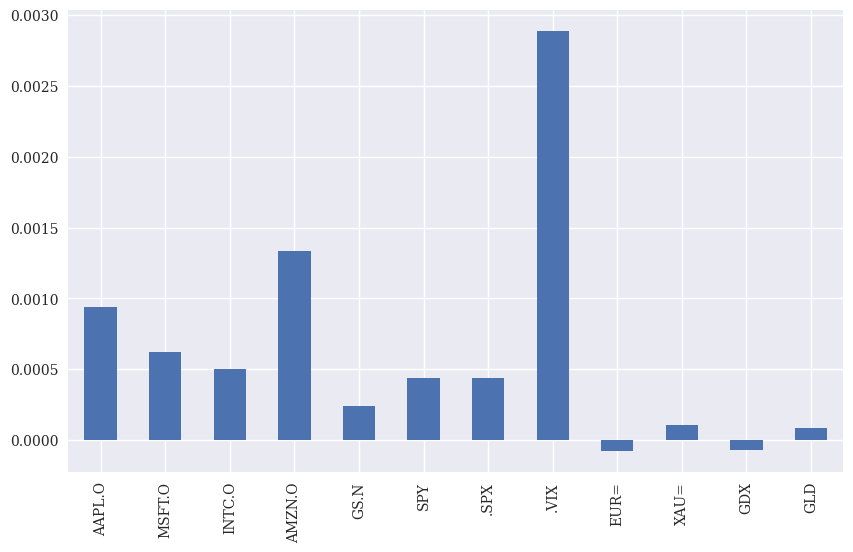

In [26]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_02.png');

# Stock data is noise and hard to detect signal, we need to perform a log return to smooth out the data and look at the percentage of change between current day and previous day

In [27]:
help(data.shift)

Help on method shift in module pandas.core.frame:

shift(periods: 'int' = 1, freq: 'Frequency | None' = None, axis: 'Axis' = 0, fill_value: 'Hashable' = <no_default>) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Shift index by desired number of periods with an optional time `freq`.
    
    When `freq` is not passed, shift the index without realigning the data.
    If `freq` is passed (in this case, the index must be date or datetime,
    or it will raise a `NotImplementedError`), the index will be
    increased using the periods and the `freq`. `freq` can be inferred
    when specified as "infer" as long as either freq or inferred_freq
    attribute is set in the index.
    
    Parameters
    ----------
    periods : int
        Number of periods to shift. Can be positive or negative.
    freq : DateOffset, tseries.offsets, timedelta, or str, optional
        Offset to use from the tseries module or time rule (e.g. 'EOM').
        If `freq` is specified then the 

In [28]:
rets = np.log(data / data.shift(1))  

In [22]:
rets.head().round(3)  

AAPL.O  MSFT.O  INTC.O  AMZN.O   GS.N    SPY   .SPX   .VIX   EUR=  \
Date                                                                            
2010-01-01     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-04     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN  0.006   
2010-01-05   0.002   0.000  -0.000   0.006  0.018  0.003  0.003 -0.035 -0.003   
2010-01-06  -0.016  -0.006  -0.003  -0.018 -0.011  0.001  0.001 -0.010  0.003   
2010-01-07  -0.002  -0.010  -0.010  -0.017  0.019  0.004  0.004 -0.005 -0.007   

             XAU=    GDX    GLD  
Date                             
2010-01-01    NaN    NaN    NaN  
2010-01-04  0.021    NaN    NaN  
2010-01-05 -0.001  0.010 -0.001  
2010-01-06  0.018  0.024  0.016  
2010-01-07 -0.006 -0.005 -0.006

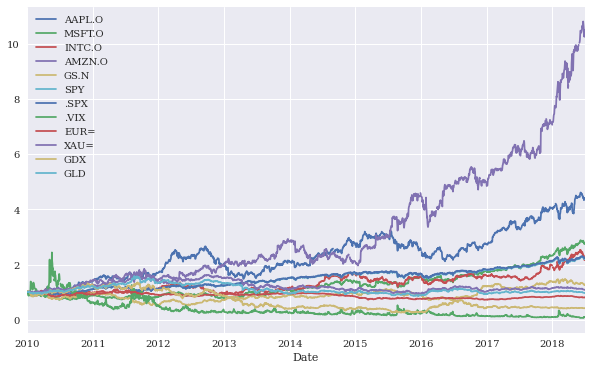

In [23]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_03.png');

### Resampling

In [30]:
data.resample('1w', label='right').last()
help(data.resample)

Help on method resample in module pandas.core.frame:

resample(rule, axis: 'Axis' = 0, closed: 'str | None' = None, label: 'str | None' = None, convention: 'str' = 'start', kind: 'str | None' = None, on: 'Level' = None, level: 'Level' = None, origin: 'str | TimestampConvertibleTypes' = 'start_day', offset: 'TimedeltaConvertibleTypes | None' = None, group_keys: 'bool' = False) -> 'Resampler' method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time series.
    The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
    or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
    series/index to the ``on``/``level`` keyword parameter.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for

In [25]:
data.resample('1m', label='right').last()

AAPL.O   MSFT.O  INTC.O   AMZN.O    GS.N       SPY     .SPX  \
Date                                                                          
2010-01-31   27.437544  28.1800   19.40   125.41  148.72  107.3900  1073.87   
2010-02-28   29.231399  28.6700   20.53   118.40  156.35  110.7400  1104.49   
2010-03-31   33.571395  29.2875   22.29   135.77  170.63  117.0000  1169.43   
2010-04-30   37.298534  30.5350   22.84   137.10  145.20  118.8125  1186.69   
2010-05-31   36.697106  25.8000   21.42   125.46  144.26  109.3690  1089.41   
...                ...      ...     ...      ...     ...       ...      ...   
2018-02-28  178.120000  93.7700   49.29  1512.45  262.93  271.6500  2713.83   
2018-03-31  167.780000  91.2700   52.08  1447.34  251.86  263.1500  2640.87   
2018-04-30  165.260000  93.5200   51.62  1566.13  238.33  264.5100  2648.05   
2018-05-31  186.870000  98.8400   55.20  1629.62  225.88  270.9400  2705.27   
2018-06-30  185.110000  98.6100   49.71  1699.80  220.57  271.2800  2718.37   

             .VIX    EUR=     XAU=    GDX      GLD  
Date                                                
2010-01-31  24.62  1.3862  1081.05  40.72  105.960  
2010-02-28  19.50  1.3625  1116.10  43.89  109.430  
2010-03-31  17.59  1.3510  1112.80  44.41  108.950  
2010-04-30  22.05  1.3295  1178.25  50.51  115.360  
2010-05-31  32.07  1.2305  1215.71  49.86  118.881  
...           ...     ...      ...    ...      ...  
2018-02-28  19.85  1.2193  1317.66  21.35  125.000  
2018-03-31  19.97  1.2321  1324.00  21.98  125.790  
2018-04-30  15.93  1.2077  1314.95  22.28  124.590  
2018-05-31  15.43  1.1690  1297.92  22.34  123.100  
2018-06-30  16.09  1.1683  1252.25  22.31  118.650  

[102 rows x 12 columns]

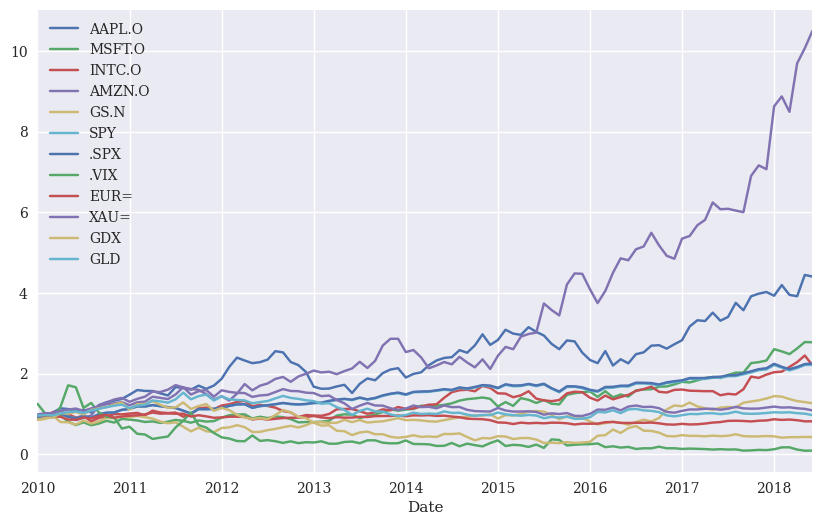

In [31]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last(
                          ).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_04.png');

## Rolling Statistics,  Simple Moving Average (SMA) 

In [46]:
sym = 'AAPL.O'

In [47]:
data = pd.DataFrame(data[sym]).dropna()

In [48]:
data.tail()

AAPL.O
Date              
2018-06-25  182.17
2018-06-26  184.43
2018-06-27  184.16
2018-06-28  185.50
2018-06-29  185.11

### An Overview

In [49]:
window = 20  

In [50]:
data['min'] = data[sym].rolling(window=window).min()  

In [51]:
data['mean'] = data[sym].rolling(window=window).mean()  

In [52]:
data['std'] = data[sym].rolling(window=window).std()  

In [53]:
data['median'] = data[sym].rolling(window=window).median()  

In [54]:
data['max'] = data[sym].rolling(window=window).max()  

In [55]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [56]:
data.dropna().head()

AAPL.O        min       mean       std     median        max  \
Date                                                                          
2010-02-01  27.818544  27.437544  29.580892  0.933650  29.821542  30.719969   
2010-02-02  27.979972  27.437544  29.451249  0.968048  29.711113  30.719969   
2010-02-03  28.461400  27.437544  29.343035  0.950665  29.685970  30.719969   
2010-02-04  27.435687  27.435687  29.207892  1.021129  29.547113  30.719969   
2010-02-05  27.922829  27.435687  29.099892  1.037811  29.419256  30.719969   

                 ewma  
Date                   
2010-02-01  27.805432  
2010-02-02  27.936337  
2010-02-03  28.330134  
2010-02-04  27.659299  
2010-02-05  27.856947

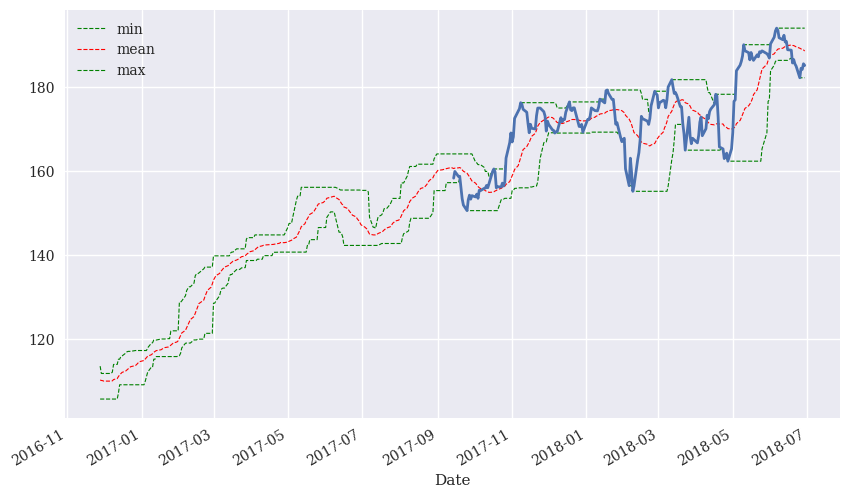

In [57]:
ax = data[['min', 'mean', 'max']].iloc[-400:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  
# plt.savefig('../../images/ch08/fts_05.png');

## Homework Exercise 1: A Technical Analysis Example, you are an investor, you will go "long" on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. 

In [58]:
sym = 'AAPL.O'
data['SMA1'] = data[sym].rolling(window=42).mean()  

In [59]:
data['SMA2'] = data[sym].rolling(window=252).mean()  

In [60]:
data[[sym, 'SMA1', 'SMA2']].tail()

AAPL.O        SMA1        SMA2
Date                                      
2018-06-25  182.17  185.606190  168.265556
2018-06-26  184.43  186.087381  168.418770
2018-06-27  184.16  186.607381  168.579206
2018-06-28  185.50  187.089286  168.736627
2018-06-29  185.11  187.470476  168.901032

Task 1: Please Plot the AAPL's stock, SMA 1 (Short Term) and SMA2 (Long Term)

In [61]:
data.dropna(inplace=True)  

Task 2: Please Calculate your position based on the common trading strategy listed above 


Task 3: Draw your position on the plots on AAPL.O,  When you have long position, value should be "1", otherwise, value should be "0"

## Regression Analysis

In [62]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv('./tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [63]:
data = raw[['.SPX', '.VIX']].dropna()

In [64]:
data.tail()

.SPX   .VIX
Date                      
2018-06-25  2717.07  17.33
2018-06-26  2723.06  15.92
2018-06-27  2699.63  17.91
2018-06-28  2716.31  16.85
2018-06-29  2718.37  16.09

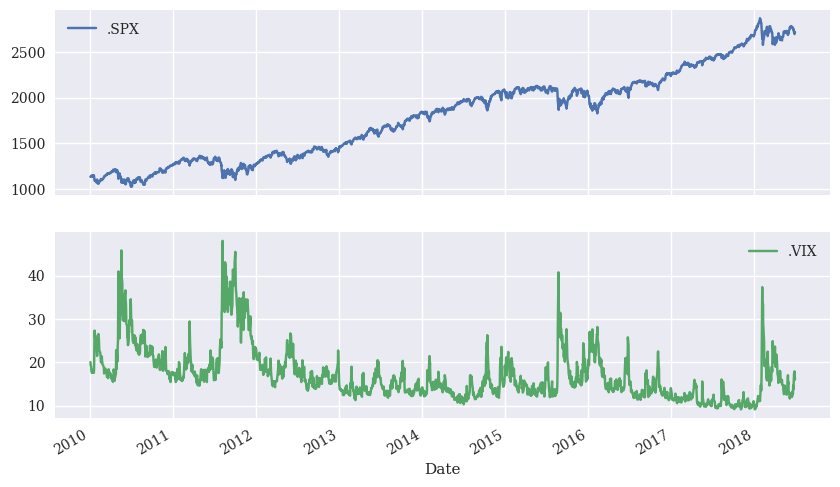

In [65]:
data.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_08.png');

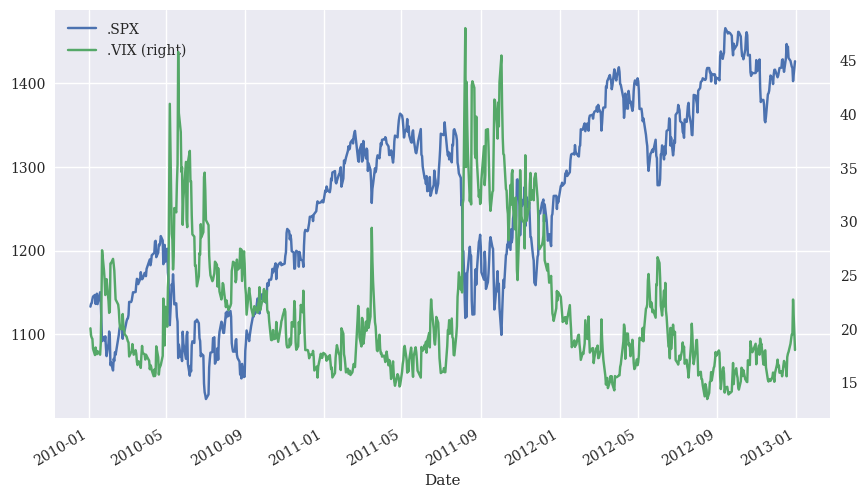

In [66]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_09.png');

### Log Returns

In [67]:
rets = np.log(data / data.shift(1)) 

In [68]:
rets.head()

.SPX      .VIX
Date                          
2010-01-04       NaN       NaN
2010-01-05  0.003111 -0.035038
2010-01-06  0.000545 -0.009868
2010-01-07  0.003993 -0.005233
2010-01-08  0.002878 -0.050024

In [69]:
rets.dropna(inplace=True)

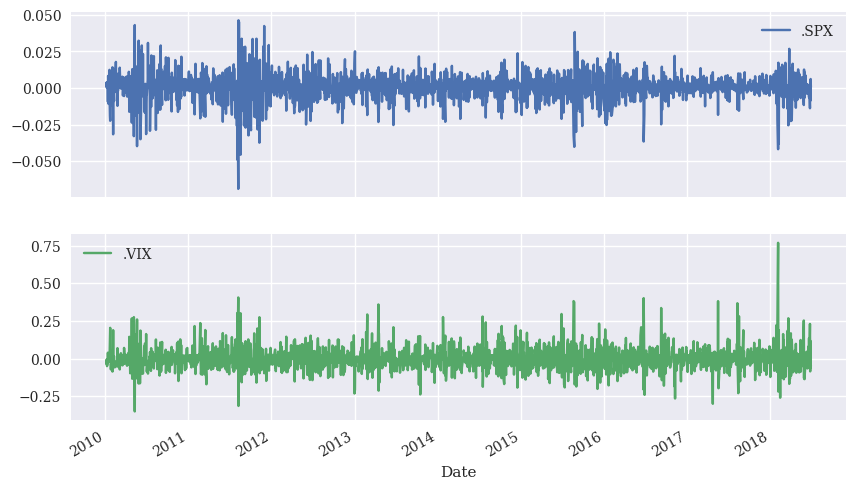

In [70]:
rets.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_10.png');

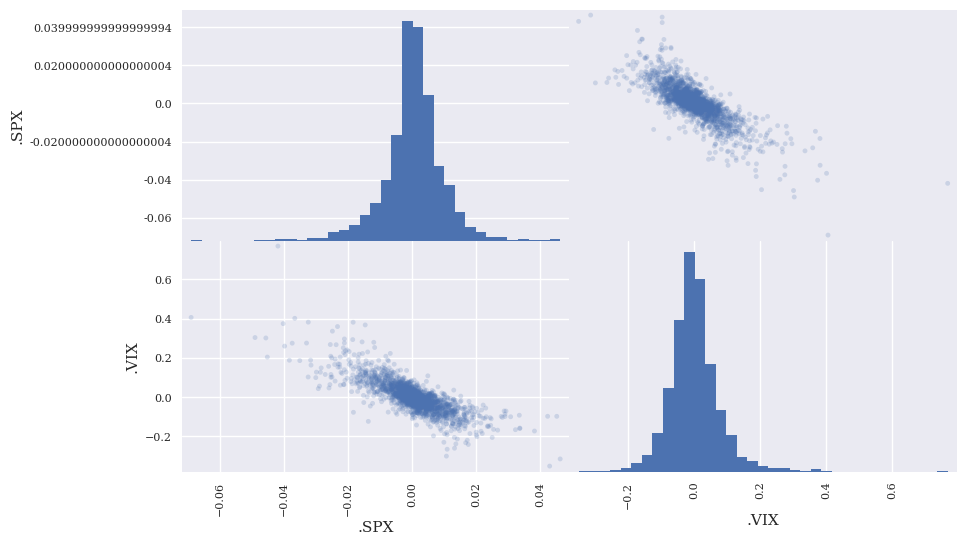

In [71]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

### OLS Regression

In [72]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

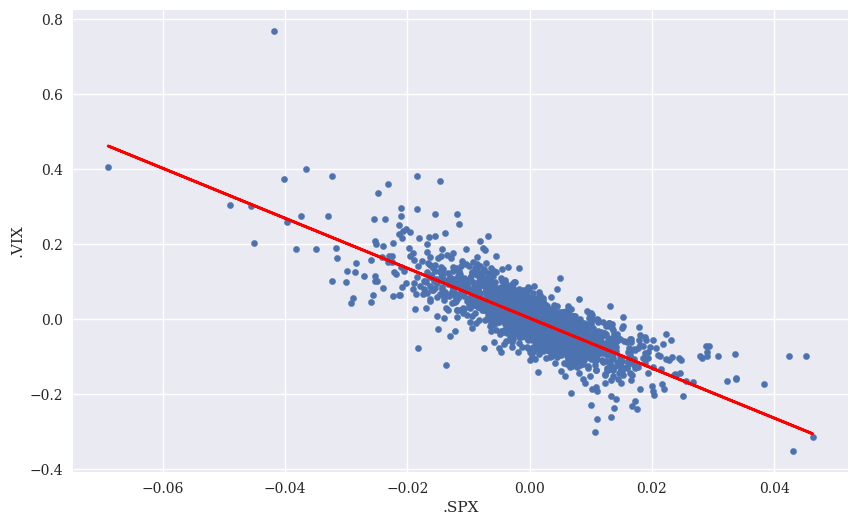

In [73]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  
# plt.savefig('../../images/ch08/fts_12.png');

### Correlation

In [74]:
rets.corr()  

.SPX      .VIX
.SPX  1.000000 -0.804382
.VIX -0.804382  1.000000

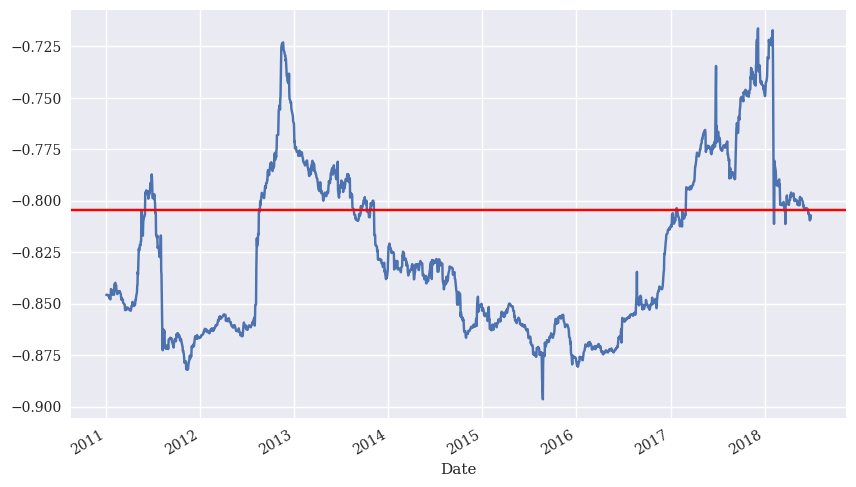

In [80]:
ax = rets['.SPX'].rolling(window=252).corr(
                  rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  
# plt.savefig('../../images/ch08/fts_13.png');

## Homework Exercise 2: Please use visualization to understand the data structure among these 12 stocks or indices, Please draw a picture of 2-D scatter plots  that is similar to the layout of Figure 3.6 on page 83 in your textbook "Introduction to Statistical Learning", Make sure you perform a Log Return transformation on all time series input

In [81]:
# EOD data from Thomson Reuters Eikon Data API
Your_data = pd.read_csv('./tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)
Your_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


## Homework Exercise 3: Please calculate 12X12 Co-relation matrix among the log return of all indices, Hint: Please use Scikit Learning

In [82]:
A=Your_data.corr()
print(A)

          AAPL.O    MSFT.O    INTC.O    AMZN.O      GS.N       SPY      .SPX  \
AAPL.O  1.000000  0.924437  0.920085  0.888065  0.766361  0.944851  0.944770   
MSFT.O  0.924437  1.000000  0.950978  0.976018  0.839008  0.937022  0.937334   
INTC.O  0.920085  0.950978  1.000000  0.909608  0.762886  0.907580  0.907783   
AMZN.O  0.888065  0.976018  0.909608  1.000000  0.783544  0.893683  0.894064   
GS.N    0.766361  0.839008  0.762886  0.783544  1.000000  0.843783  0.844045   
SPY     0.944851  0.937022  0.907580  0.893683  0.843783  1.000000  0.999980   
.SPX    0.944770  0.937334  0.907783  0.894064  0.844045  0.999980  1.000000   
.VIX   -0.489090 -0.431681 -0.402452 -0.375691 -0.514894 -0.576503 -0.576503   
EUR=   -0.686018 -0.616986 -0.611614 -0.580301 -0.525205 -0.672167 -0.671885   
XAU=   -0.299070 -0.408274 -0.358605 -0.313468 -0.636547 -0.461245 -0.461047   
GDX    -0.705473 -0.660572 -0.649064 -0.581873 -0.661659 -0.823570 -0.823106   
GLD    -0.350587 -0.456109 -0.405236 -0.

## Homework Exercise 4: You need to follow the above example to regress  the VIX (VIX is the target) onto each of the independant variables (companies) .   You will create elevent single variable regressions.  Please use the above example to define regressions and draw the regression lines. You will generate 11 pictures. Please layout all pictures with a clean look

## High Frequency Data

In [97]:
# from fxcmpy import fxcmpy_tick_data_reader as tdr
# data = tdr('EURUSD', start='2018-6-25', end='2018-06-30')
# data.get_data(start='2018-6-29',
#               end='2018-06-30').to_csv('../../source/fxcm_eur_usd_tick_data.csv')

In [83]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('./fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)

CPU times: user 249 ms, sys: 21.8 ms, total: 271 ms
Wall time: 270 ms


In [84]:
tick.size

922714

In [87]:
tick.head # Mid is the middle points between bid and ask 

<bound method NDFrame.head of                              Bid      Ask       Mid
2018-06-29 00:00:00.082  1.15635  1.15636  1.156355
2018-06-29 00:00:00.106  1.15634  1.15636  1.156350
2018-06-29 00:00:00.114  1.15634  1.15635  1.156345
2018-06-29 00:00:00.121  1.15634  1.15634  1.156340
2018-06-29 00:00:00.151  1.15632  1.15634  1.156330
...                          ...      ...       ...
2018-06-29 20:59:00.011  1.16815  1.16859  1.168370
2018-06-29 20:59:00.279  1.16815  1.16860  1.168375
2018-06-29 20:59:00.511  1.16816  1.16861  1.168385
2018-06-29 20:59:00.584  1.16817  1.16862  1.168395
2018-06-29 20:59:00.607  1.16816  1.16861  1.168385

[461357 rows x 3 columns]>

In [88]:
tick['Mid'] = tick.mean(axis=1)  

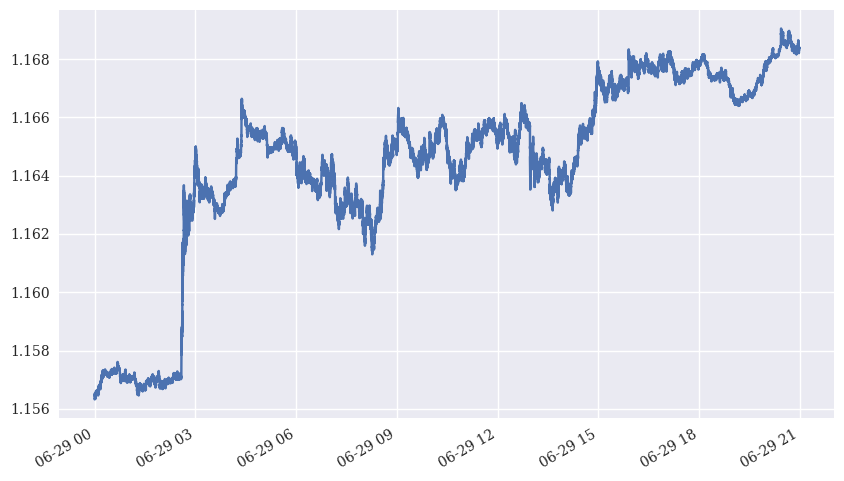

In [89]:
tick['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_14.png');

In [90]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [96]:
tick_resam.tail()

Bid      Ask       Mid
2018-06-29 20:40:00  1.16879  1.16882  1.168805
2018-06-29 20:45:00  1.16850  1.16853  1.168515
2018-06-29 20:50:00  1.16820  1.16826  1.168230
2018-06-29 20:55:00  1.16824  1.16836  1.168300
2018-06-29 21:00:00  1.16816  1.16861  1.168385

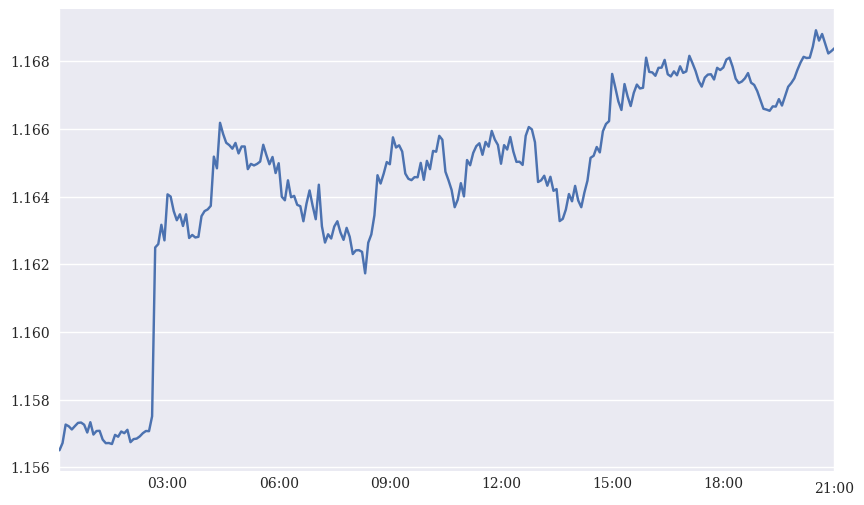

In [92]:
tick_resam['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_15.png');

## (Bonus points) Homework Exercise 5: You need to do self-correlation to detect whether any pattern is repeated again and again.  This is to calculate Autocorrelation that refers to the degree of correlation of the same variables between two successive time intervals. It measures how the lagged version of the value of a variable is related to the original version of it in a time series.

 Please choose lag to be half an hour, one hour, two hours.  You need to calculate the time series of eur_usd_tick_data between two intervals with the lag of (half an hour, one hour, and two hours).   
 
 The output will be three time series of autocorrelation: 